In [ ]:
#| default_exp experimental

# experimental

> Experimental `dialoghelper` capabilities.

In [ ]:
#| export
from dialoghelper.core import *
from fastcore.all import *
from fasthtml.common import Div,Script
from httpx import post as xpost
from importlib import resources
from lisette.core import *

import base64,json,uuid,time

In [ ]:
from IPython.display import display, Image

In [ ]:
#| export
def iife(code: str) -> str:
    "Wrap javascript code string in an IIFE and execute it via `add_html`"
    trigger_script = f'''
(async () => {{
{code}
}})();
'''
    add_html(Div(Script(trigger_script), hx_swap_oob=f'beforeend:#js-script'))

In [ ]:
#| export
def start_share():
    iife((resources.files('dialoghelper')/'screenshot.js').read_text())
    iife('await setupVideoStream();')

In [ ]:
start_share()

In [ ]:
#| export
def capture_screen():
    'Capture screenshot, automatically starting screen share if needed.'
    idx = uuid.uuid4()
    iife(f"pushData('{idx}', {{img_data: await getScreenshot()}});")
    time.sleep(0.5)
    d = dict2obj(xpost('http://localhost:5001/pop_data_blocking_', data={'data_id': idx}).json())
    if 'img_data' in d: return ToolResponse([{'type': 'image_url', 'image_url': d.img_data}])
    else: return f'Capture failed: {d.error}'

In [ ]:
res = capture_screen(); res.content[0].keys()

dict_keys(['type', 'image_url'])


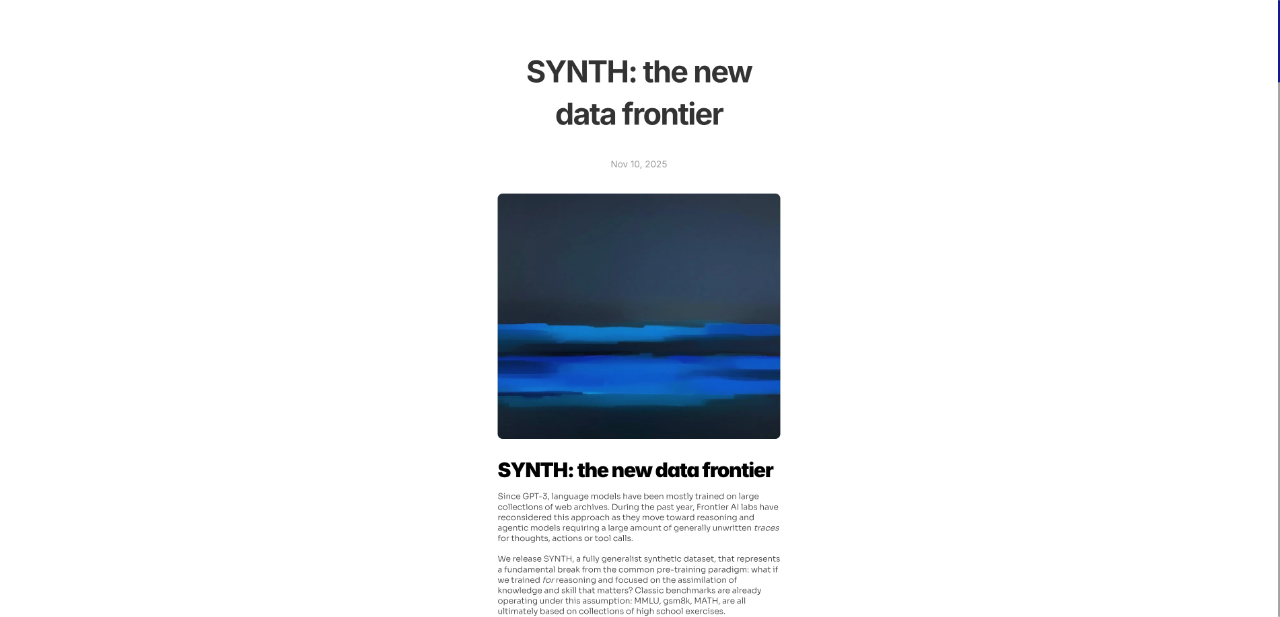

In [ ]:
display(Image(url=res.content[0]['image_url']))

In [ ]:
c = Chat('claude-sonnet-4-5-20250929', tools=[capture_screen]); c

In [ ]:
c('please view my screen and describe what you see', max_steps=10)

I can see a webpage or article titled **"SYNTH: the new data frontier"** dated Nov 10, 2025. 

The page features:
- A large heading at the top with the title
- An abstract or artistic image showing horizontal bands of blue tones against a dark background, reminiscent of a minimalist landscape or data visualization
- Below the image, the same title is repeated as a subheading
- Body text that discusses GPT-X language models and their training on web archives, mentioning Frontier AI labs and their approach to reasoning and knowledge assimilation
- The text appears to discuss SYNTH as representing a "generalist-synthetic dataset" that breaks from common pre-training paradigms
- References to benchmarks like MMLU, MATH, and other evaluation metrics

The overall design is clean and minimalist with a white background and dark text. The content appears to be about synthetic data and AI training methodologies.

<details>

- id: `chatcmpl-e63cf4bb-65ee-4c00-b9ec-f9e0617daaff`
- model: `claude-sonnet-4-5-20250929`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=208, prompt_tokens=1688, total_tokens=1896, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

## export -

In [ ]:
#|hide
from nbdev import nbdev_export
nbdev_export()